In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(10,6)

In [2]:
data= pd.read_csv("Bengaluru_House_Data.csv",na_values=["NA","?"])

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
data["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
data= data.iloc[:,[2,3,5,6,7,8]]

# Data Cleaning

In [7]:
data.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
data.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
data["bath"].fillna(data["bath"].median(),inplace=True)

In [10]:
data["balcony"].fillna(data["balcony"].median(),inplace=True)

In [11]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [14]:
data["bhk"]= data["size"].apply(lambda x: int(x.split(" ")[0]))

In [15]:
data.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [16]:
data.drop("size",axis=1,inplace=True)

In [17]:
data.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [18]:
len(data['location'].unique())

1304

In [19]:
data["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
data[data.bhk>20]

,location,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43


In [21]:
data.total_sqft.unique()  # Here we can see that somevalues are in range

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
data[data["total_sqft"].apply(is_float)].head(34)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
5,Whitefield,1170,2.0,1.0,38.00,2
6,Old Airport Road,2732,4.0,2.0,204.00,4
7,Rajaji Nagar,3300,4.0,2.0,600.00,4
8,Marathahalli,1310,3.0,1.0,63.25,3
9,Gandhi Bazar,1020,6.0,2.0,370.00,6


In [24]:
def convert_sqft_to_num(x):
    tokens= x.split("-")
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
convert_sqft_to_num("2166")

2166.0

In [26]:
convert_sqft_to_num("1133-1384")

1258.5

In [27]:
data["total_sqft"]= data["total_sqft"].apply(convert_sqft_to_num)

In [28]:
data.head(10)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2
6,Old Airport Road,2732.0,4.0,2.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,2.0,600.00,4
8,Marathahalli,1310.0,3.0,1.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,2.0,370.00,6


# Feature Engineering

In [29]:
data["price_per_sqft"]= data["price"]*100000/data["total_sqft"]

In [30]:
data.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [31]:
data.location= data.location.apply(lambda x: x.strip()) # We see that there are many places whose occurance is 1 time or 2 times only

location_stats= data.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield           540
Sarjapur  Road       397
Electronic City      304
Kanakpura Road       273
Thanisandra          237
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [32]:
len(location_stats[location_stats<=10])

1052

In [33]:
location_stats_less_ten= location_stats[location_stats<=10]
location_stats_less_ten

location
Nagappa Reddy Layout     10
Sector 1 HSR Layout      10
1st Block Koramangala    10
Naganathapura            10
Nagadevanahalli          10
                         ..
LIC Colony                1
Kuvempu Layout            1
Kumbhena Agrahara         1
Kudlu Village,            1
1 Annasandrapalya         1
Name: location, Length: 1052, dtype: int64

In [34]:
data.location= data.location.apply(lambda x: "other" if x in location_stats_less_ten else x) 

In [35]:
len(data.location.unique())

242

# Outlier Detection and Removal

In [36]:
data[data.total_sqft/data.bhk<300].head(10)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268
119,Hennur Road,276.0,3.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,950.0,7.0,0.0,115.0,7,12105.263158
149,other,1034.0,5.0,2.0,185.0,6,17891.682785


In [37]:
data.shape

(13303, 7)

In [38]:
data= data[~(data.total_sqft/data.bhk<300)]

In [39]:
data.shape

(12559, 7)

In [40]:
def remove_ppt_outliers(df):
    df_out= pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m= np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df= subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out= pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [41]:
data= remove_ppt_outliers(data)

In [42]:
data.shape

(10286, 7)

In [43]:
def plot_scatter(df,location):
    bhk2= df[(df.location==location)& (df.bhk==2)]
    bhk3= df[(df.location==location)& (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"]=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color="blue",label="2BHK",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color="green",label="3BHK",s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

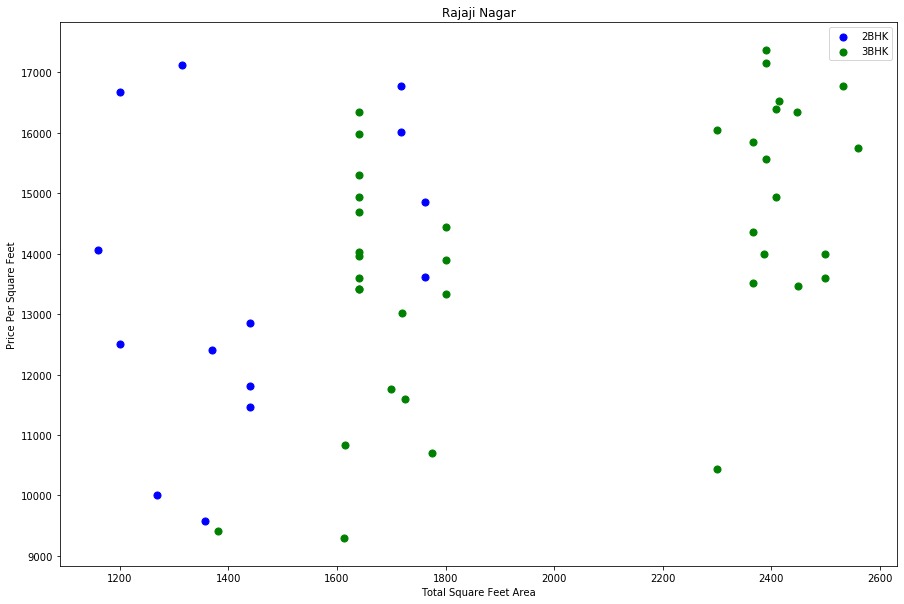

In [44]:
plot_scatter(data,"Rajaji Nagar")

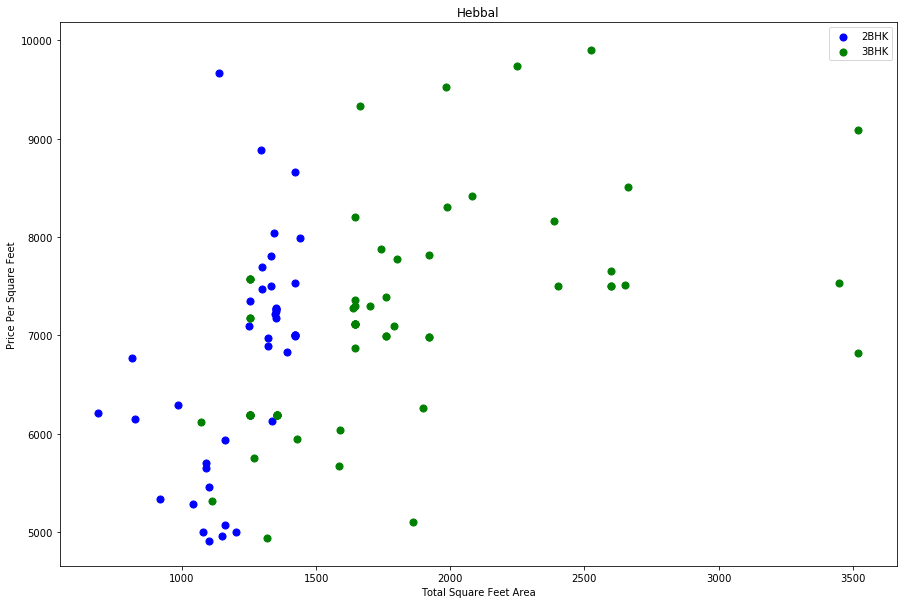

In [45]:
plot_scatter(data,"Hebbal")

In [46]:
# Now we can remove those 2 BHK apartments whose price_per_sqft is less than the mean price_per_sqft of 1 BHK apartment

In [47]:
def remove_bhk_outliers(df):
    exclude_indices= np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]= {
                "mean" : np.mean(bhk_df.price_per_sqft),
                "std" : np.std(bhk_df.price_per_sqft),
                "count" : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats= bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indices= np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
                
    return df.drop(exclude_indices,axis="index")           

In [48]:
data= remove_bhk_outliers(data)

In [49]:
data.shape

(7353, 7)

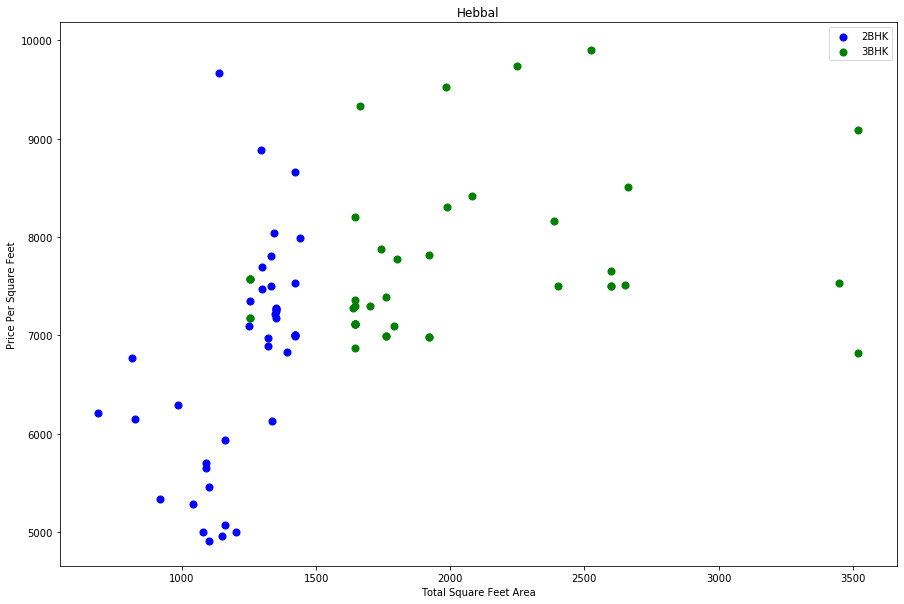

In [50]:
plot_scatter(data,"Hebbal")

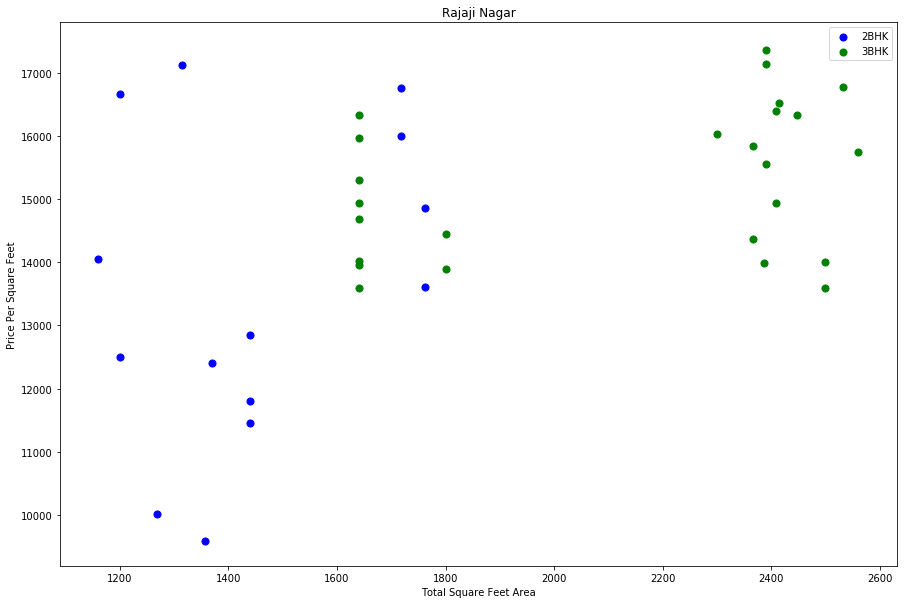

In [51]:
plot_scatter(data,"Rajaji Nagar")

Text(0, 0.5, 'Count')

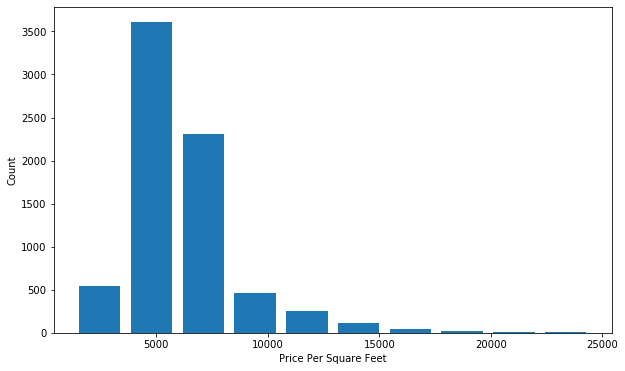

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(data.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [53]:
data.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [54]:
data[data.bath>10]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
5306,Neeladri Nagar,4000.0,12.0,2.0,160.0,10,4000.000000
8530,other,12000.0,12.0,2.0,525.0,10,4375.000000
8619,other,10000.0,16.0,2.0,550.0,16,5500.000000
9352,other,6000.0,12.0,2.0,150.0,11,2500.000000
9683,other,5425.0,13.0,0.0,275.0,13,5069.124424


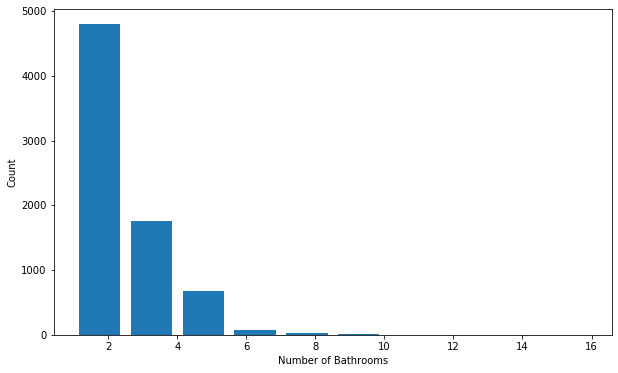

In [55]:
plt.figure(figsize=(10,6))
plt.hist(data.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.show()

In [56]:
data[data.bath>data.bhk+2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1634,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
5267,Nagasandra,7000.0,8.0,2.0,450.0,4,6428.571429
6748,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8455,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [57]:
data= data[data.bath<data.bhk+2]

In [58]:
data.shape

(7275, 7)

# Model Building

In [59]:
dummies= pd.get_dummies(data.location,drop_first=True)

In [60]:
dummies.head(3)

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
data= pd.concat([data,dummies],axis="columns")

In [62]:
data.drop("location",axis="columns",inplace=True)
data.head(2)

,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,1.0,428.0,4,15017.543860,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,11901.840491,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
data.drop("price_per_sqft",axis="columns",inplace=True)
data.head()

,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,1.0,428.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
data.shape

(7275, 246)

In [65]:
X= data.drop("price",axis="columns")

In [66]:
X.head()

,total_sqft,bath,balcony,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,1.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
y= data.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [69]:
X_train.shape

(5820, 245)

In [70]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
print("Validation Accuracy : {}".format(lr.score(X_test,y_test)*100))
print("Training Accuracy : {}".format(lr.score(X_train,y_train)*100))

Validation Accuracy : 80.6939122791125
Training Accuracy : 86.5872005272463


In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [73]:
cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [74]:
a=cross_val_score(LinearRegression(),X,y,cv=cv)

In [75]:
a

array([0.80693912, 0.7720927 , 0.86462327, 0.83536095, 0.81809933])

In [76]:
np.mean(a)

0.8194230754379991

In [77]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost

In [78]:
def find_best_model(X,y):
    algos= {
        "linear_regression": {
            "model": LinearRegression(),
            "params": {
                "normalize": [True,False]
            }
        },
        "lasso":{
            "model": Lasso(),
            "params": {
                "alpha":[1,2],
                "selection":["random","cyclic"]
            }
        },
        "decision_tree":{
            "model": DecisionTreeRegressor(),
            "params": {
                "criterion":["mse","friedman_mse"],
                "splitter": ["best","random"]
            }
        }
    }
    
    scores= []
    cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs= GridSearchCV(config["model"],config["params"],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model":algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
    return pd.DataFrame(scores,columns= ["model","best_score","best_params"])   

find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.819423,{'normalize': False}
1,lasso,0.690079,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.741252,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


# XGBoost

In [79]:
xg= xgboost.XGBRegressor()

In [81]:
cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [83]:
b= cross_val_score(xg,X,y,cv=cv,n_jobs=4,verbose=0)

In [84]:
np.mean(b)

0.7889997339263616

# Random Forest 

In [85]:
c= cross_val_score(RandomForestRegressor(),X,y,cv=cv,n_jobs=-1,verbose=0)

In [86]:
np.mean(c)

0.7848025193102239

# Neural Network

In [88]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [92]:
model= Sequential()
model.add(Dense(16, activation="relu",kernel_initializer="he_uniform",input_dim=245))
model.add(Dense(16,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(1,kernel_initializer="he_uniform"))

In [93]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mae"])

In [95]:
model.fit(X_train,y_train,epochs=300)

Epoch 1/300
5820/5820 [==============================] - 0s 81us/sample - loss: 1742.6827 - mean_absolute_error: 21.0528
Epoch 2/300
5820/5820 [==============================] - 0s 79us/sample - loss: 1748.0564 - mean_absolute_error: 20.6079
Epoch 3/300
5820/5820 [==============================] - 0s 81us/sample - loss: 1728.5833 - mean_absolute_error: 21.0180
Epoch 4/300
5820/5820 [==============================] - 0s 78us/sample - loss: 1694.4996 - mean_absolute_error: 20.9166
Epoch 5/300
5820/5820 [==============================] - 0s 76us/sample - loss: 1697.0206 - mean_absolute_error: 20.3512
Epoch 6/300
5820/5820 [==============================] - 0s 81us/sample - loss: 1689.7204 - mean_absolute_error: 20.7063
Epoch 7/300
5820/5820 [==============================] - 0s 77us/sample - loss: 1623.0166 - mean_absolute_error: 19.8869
Epoch 8/300
5820/5820 [==============================] - 0s 77us/sample - loss: 1695.1009 - mean_absolute_error: 20.7345
Epoch 9/300
5820/5820 [=========

5820/5820 [==============================] - ETA: 0s - loss: 1455.6397 - mean_absolute_error: 18.708 - 0s 75us/sample - loss: 1458.5974 - mean_absolute_error: 18.8838
Epoch 69/300
5820/5820 [==============================] - 0s 79us/sample - loss: 1455.5066 - mean_absolute_error: 18.4711
Epoch 70/300
5820/5820 [==============================] - 0s 83us/sample - loss: 1370.3219 - mean_absolute_error: 18.5279
Epoch 71/300
5820/5820 [==============================] - 0s 75us/sample - loss: 1544.5085 - mean_absolute_error: 19.7233
Epoch 72/300
5820/5820 [==============================] - 0s 80us/sample - loss: 1460.8010 - mean_absolute_error: 19.3657
Epoch 73/300
5820/5820 [==============================] - 0s 78us/sample - loss: 1414.5263 - mean_absolute_error: 18.7985
Epoch 74/300
5820/5820 [==============================] - 0s 81us/sample - loss: 1527.6897 - mean_absolute_error: 19.2866
Epoch 75/300
5820/5820 [==============================] - 0s 77us/sample - loss: 1408.8289 - mean_abs

5820/5820 [==============================] - 0s 74us/sample - loss: 1555.7527 - mean_absolute_error: 19.6325
Epoch 135/300
5820/5820 [==============================] - 0s 78us/sample - loss: 1367.9116 - mean_absolute_error: 18.6575
Epoch 136/300
5820/5820 [==============================] - 0s 82us/sample - loss: 1534.3541 - mean_absolute_error: 19.6739
Epoch 137/300
5820/5820 [==============================] - 0s 72us/sample - loss: 1545.6729 - mean_absolute_error: 20.1433
Epoch 138/300
5820/5820 [==============================] - 0s 78us/sample - loss: 1301.4504 - mean_absolute_error: 18.1584
Epoch 139/300
5820/5820 [==============================] - 0s 76us/sample - loss: 1306.5123 - mean_absolute_error: 18.2264
Epoch 140/300
5820/5820 [==============================] - 0s 70us/sample - loss: 1416.2761 - mean_absolute_error: 19.0405
Epoch 141/300
5820/5820 [==============================] - 0s 70us/sample - loss: 1242.5499 - mean_absolute_error: 17.7412
Epoch 142/300
5820/5820 [=====

Epoch 200/300
5820/5820 [==============================] - 0s 77us/sample - loss: 1264.8261 - mean_absolute_error: 18.0568
Epoch 201/300
5820/5820 [==============================] - 0s 75us/sample - loss: 1518.1104 - mean_absolute_error: 20.5582
Epoch 202/300
5820/5820 [==============================] - 0s 80us/sample - loss: 1228.7611 - mean_absolute_error: 17.9509
Epoch 203/300
5820/5820 [==============================] - 0s 77us/sample - loss: 1421.3465 - mean_absolute_error: 19.4123
Epoch 204/300
5820/5820 [==============================] - 0s 75us/sample - loss: 1276.5506 - mean_absolute_error: 17.6262
Epoch 205/300
5820/5820 [==============================] - 0s 62us/sample - loss: 1295.8100 - mean_absolute_error: 17.8275
Epoch 206/300
5820/5820 [==============================] - 0s 67us/sample - loss: 1240.7074 - mean_absolute_error: 17.9799
Epoch 207/300
5820/5820 [==============================] - 0s 64us/sample - loss: 1279.0943 - mean_absolute_error: 17.8884
Epoch 208/300
58

5820/5820 [==============================] - 0s 62us/sample - loss: 1488.8234 - mean_absolute_error: 18.9306
Epoch 267/300
5820/5820 [==============================] - 0s 64us/sample - loss: 1380.2370 - mean_absolute_error: 18.5920
Epoch 268/300
5820/5820 [==============================] - 0s 57us/sample - loss: 1333.6482 - mean_absolute_error: 18.2386
Epoch 269/300
5820/5820 [==============================] - 0s 65us/sample - loss: 1351.1992 - mean_absolute_error: 18.2543
Epoch 270/300
5820/5820 [==============================] - 0s 60us/sample - loss: 1302.1586 - mean_absolute_error: 18.1372
Epoch 271/300
5820/5820 [==============================] - 0s 74us/sample - loss: 1235.6450 - mean_absolute_error: 17.8151
Epoch 272/300
5820/5820 [==============================] - 0s 75us/sample - loss: 1308.2843 - mean_absolute_error: 18.4228
Epoch 273/300
5820/5820 [==============================] - 0s 79us/sample - loss: 1458.5425 - mean_absolute_error: 18.8568
Epoch 274/300
5820/5820 [=====

In [99]:
model.evaluate(X_test,y_test)

1455/1455 [==============================] - 0s 71us/sample - loss: 2035.8413 - mean_absolute_error: 18.1298


[2035.8412981485583, 18.129833]

# Final Model

In [100]:
lr= LinearRegression(normalize=False)  # best model is Linear Regression

In [101]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
lr.score(X_test,y_test)

0.806939122791125

# Testing the Model

In [103]:
X_test.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=245)

In [104]:
def predict_price(location,sqft,bath,bhk):
    loc_index= np.where(X.columns==location)[0][0]
    
    x= np.zeros(len(X.columns))
    x[0]= sqft
    x[1]= bath
    x[2]= bhk
    if loc_index>=0:
        x[loc_index]= 1
        
    return lr.predict([x])[0]    

In [109]:
print("Estimated Price : ",predict_price("1st Phase JP Nagar",1000,2,2))

Estimated Price :  95.1309648989631


In [110]:
import pickle
with open("banglore_home_prices_model.pickle","wb") as f:
    pickle.dump(lr,f)

In [113]:
import json
columns= {
    "data_columns" : [col.lower() for col in X.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))